#### Validation for the swot-derived lake level

In [4]:
import pickle 
import matplotlib.pyplot as plt
from scripts.date_transform import date_to_decimal


In [5]:
path_lake_level_dianchi = 'data/swot_l2/pixc/dianchi-lake/dianchi_heights_lake.pkl'
path_lake_level_erhai = 'data/swot_l2/pixc/erhai-lake/erhai_heights_lake.pkl'
path_lake_level_dianchi_lakesp = 'data/swot_l2/lakeSP/dianchi/dianchi_wse_lakesp.pkl'
path_lake_level_erhai_lakesp = 'data/swot_l2/lakeSP/erhai/erhai_wse_lakesp.pkl'


In [6]:
## swot pixc
with open(path_lake_level_dianchi, 'rb') as f: 
    heights_dianchi_pixc = pickle.load(f)
with open(path_lake_level_erhai, 'rb') as f:
    heights_erhai_pixc = pickle.load(f)
## lakesp
with open(path_lake_level_dianchi_lakesp, 'rb') as f: 
    heights_dianchi_lakesp = pickle.load(f)
with open(path_lake_level_erhai_lakesp, 'rb') as f:
    heights_erhai_lakesp = pickle.load(f)


In [7]:
heights_dianchi_lakesp = dict(sorted(heights_dianchi_lakesp.items()))
# heights_dianchi_lakesp


In [8]:

def plot_lake_heights(heights_lake, date_ticks, ax, h_range=None, h_color='blue', h_label='Lake level'):
  dates_decimal = [date_to_decimal(date+'T00:00:00') for date in date_ticks]
  ax.plot(heights_lake.keys(), heights_lake.values(), '--.', 
    color=h_color, linewidth=0.6, markersize=6, label=h_label)
  ax.set_xticks(dates_decimal); ax.set_xticklabels(date_ticks, rotation=0)
  ax.legend()
  if h_range is not None:
    ax.set_ylim([h_range[0], h_range[1]]); 
    ax.set_yticks([h_range[0]+i*0.3 for i in range(0,6)]);


Text(0.5, 1.0, 'Lake level (m) in Erhai Lake')

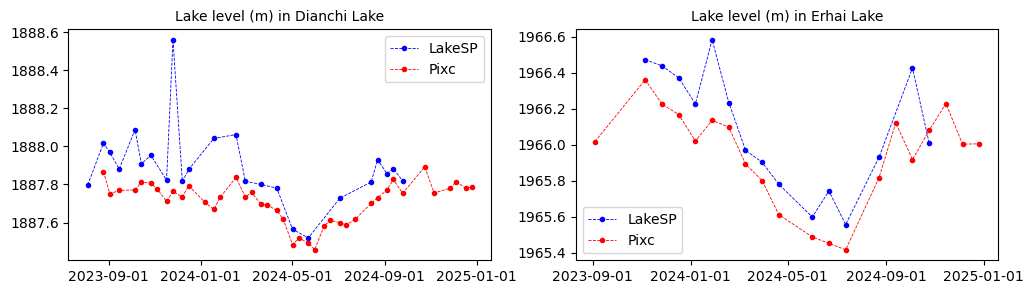

In [11]:
dates_ticks = ['2023-09-01','2024-01-01', '2024-05-01', '2024-09-01', '2025-01-01']

fig, ax = plt.subplots(1,2,figsize=(12, 3))
## dianchi
plot_lake_heights(heights_lake=heights_dianchi_lakesp, 
                  date_ticks=dates_ticks, ax=ax[0], h_label='LakeSP', h_color='blue')
ax[0].set_title('Lake level (m) in Dianchi Lake', fontsize=10)

plot_lake_heights(heights_lake=heights_dianchi_pixc, 
                  date_ticks=dates_ticks, ax=ax[0], h_color='red', h_label='Pixc')
ax[0].set_title('Lake level (m) in Dianchi Lake', fontsize=10)

## erhai
plot_lake_heights(heights_lake=heights_erhai_lakesp, 
                  date_ticks=dates_ticks, ax=ax[1], h_label='LakeSP', h_color='blue')
ax[1].set_title('Lake level (m) in Erhai Lake', fontsize=10)
plot_lake_heights(heights_lake=heights_erhai_pixc, 
                  date_ticks=dates_ticks, ax=ax[1], h_color='red', h_label='Pixc')
ax[1].set_title('Lake level (m) in Erhai Lake', fontsize=10)
